In [1]:
import numpy as np
import pandas as pd
import statistics
from scipy.stats import norm
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = np.array([32.7, 27.6, 35.1, 45.5, 40.7, 20.7, 21.0, 33.8, 37.5, 32.1, 47.7, 11.3, 35.5, 35.3, 36.2, 40.9, 23.2, 30.4, 
                30.0, 49.6, 36.0, 34.0, 27.0, 31.7, 54.6, 48.9, 21.3, 49.2, 35.5, 43.3, 33.6, 27.5, 23.0, 32.6, 19.6, 41.5, 
                37.4, 38.6, 23.8, 19.2, 23.7, 38.5, 34.4, 27.6, 35.1, 26.0, 16.4, 28.0, 39.7, 42.1, 32.7, 39.0, 21.9, 42.2, 
                50.6, 34.6, 33.9, 49.4, 43.7, 35.9])

In [3]:
variance_row = sorted(data) 
print(pd.DataFrame(variance_row, columns=['Element']))

    Element
0      11.3
1      16.4
2      19.2
3      19.6
4      20.7
5      21.0
6      21.3
7      21.9
8      23.0
9      23.2
10     23.7
11     23.8
12     26.0
13     27.0
14     27.5
15     27.6
16     27.6
17     28.0
18     30.0
19     30.4
20     31.7
21     32.1
22     32.6
23     32.7
24     32.7
25     33.6
26     33.8
27     33.9
28     34.0
29     34.4
30     34.6
31     35.1
32     35.1
33     35.3
34     35.5
35     35.5
36     35.9
37     36.0
38     36.2
39     37.4
40     37.5
41     38.5
42     38.6
43     39.0
44     39.7
45     40.7
46     40.9
47     41.5
48     42.1
49     42.2
50     43.3
51     43.7
52     45.5
53     47.7
54     48.9
55     49.2
56     49.4
57     49.6
58     50.6
59     54.6


In [4]:
r = max(data) - min(data)
print('размах ', r)

размах  43.3


In [5]:
print('x0 ', min(data))
print('max', max(data))

x0  11.3
max 54.6


In [6]:
interval_variance_row = [[['7,8 - 14,8'], []], [['14,8 - 21,8'], []], 
                         [['21,8 - 28,8'], []], [['28,8 - 35,8'], []],
                         [['35,8 - 42,8'], []], [['42,8 - 49,8'], []],
                         [['49,8 - 56,8'], []]]

for i in variance_row:
    if i >= 49.8:
        interval_variance_row[6][1].append(i) 
    elif i >= 42.8:
        interval_variance_row[5][1].append(i)
    elif i >= 35.8:
        interval_variance_row[4][1].append(i)
    elif i >= 28.8:
        interval_variance_row[3][1].append(i)
    elif i >= 21.8:
        interval_variance_row[2][1].append(i)
    elif i >= 14.8:
        interval_variance_row[1][1].append(i)
    elif i >= 7.8:
        interval_variance_row[0][1].append(i)
        
print(pd.DataFrame(interval_variance_row, columns=['interval', 'values']))

        interval                                             values
0   [7,8 - 14,8]                                             [11.3]
1  [14,8 - 21,8]               [16.4, 19.2, 19.6, 20.7, 21.0, 21.3]
2  [21,8 - 28,8]  [21.9, 23.0, 23.2, 23.7, 23.8, 26.0, 27.0, 27....
3  [28,8 - 35,8]  [30.0, 30.4, 31.7, 32.1, 32.6, 32.7, 32.7, 33....
4  [35,8 - 42,8]  [35.9, 36.0, 36.2, 37.4, 37.5, 38.5, 38.6, 39....
5  [42,8 - 49,8]   [43.3, 43.7, 45.5, 47.7, 48.9, 49.2, 49.4, 49.6]
6  [49,8 - 56,8]                                       [50.6, 54.6]


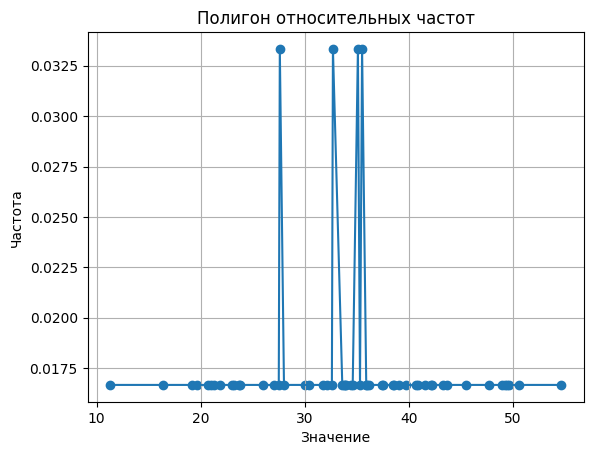

In [7]:
statistical_row = Counter(variance_row)
stat_values = [(x / 60) for x in statistical_row.values()]
stat_values = np.array(stat_values)
stat_values = stat_values.reshape(56, -1)
plt.title("Полигон относительных частот")
plt.xlabel("Значение")
plt.ylabel("Частота")
plt.grid()
plt.plot(statistical_row.keys(), stat_values)
plt.scatter(statistical_row.keys(), stat_values, label='Точки')
plt.show()

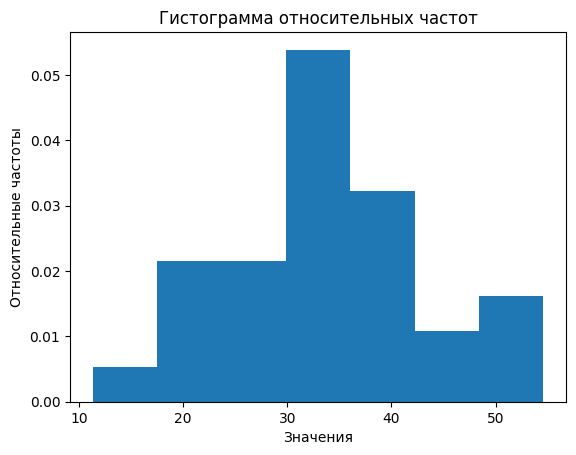

In [8]:
plt.title('Гистограмма относительных частот')
plt.xlabel('Значения')
plt.ylabel('Относительные частоты')
plt.hist(data, bins=7, density=True)
plt.show()

[1, 6, 11, 18, 14, 8, 2]
7


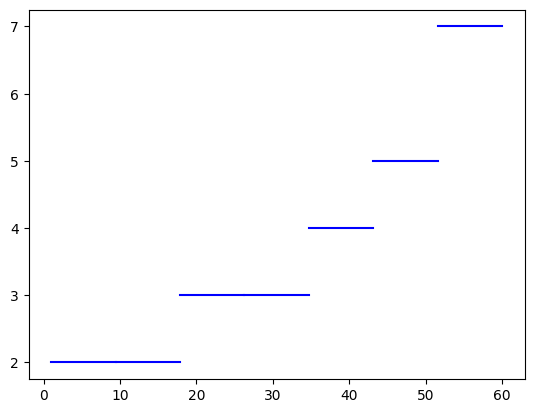

In [9]:
interval_variance_row_values = [len(x[1]) for x in interval_variance_row]
print(interval_variance_row_values)
empirical_func = [0 for i in range(7)]
empirical_func[0] = interval_variance_row_values [0]
print(len(list(interval_variance_row_values )))
for i in range(1, len(interval_variance_row_values )):
    empirical_func[i] = empirical_func[i - 1] + interval_variance_row_values [i]

hist, edges = np.histogram(empirical_func, bins=len(empirical_func))
Y = hist.cumsum()
for i in range(len(Y)):
    plt.plot([edges[i], edges[i+1]], [Y[i], Y[i]], c='blue')
plt.show()

In [10]:
sample_mean = sum(variance_row) / len(variance_row)
print('Выборочное среднее', sample_mean)

variance = statistics.variance(variance_row)
corrected_variance = ((len(variance_row) - 1) / len(variance_row)) * variance
print('Исправленная выборочная дисперсия', corrected_variance)

mode = statistical_row.most_common(1)[0][0]
print("Мода ", mode)

median = variance_row[(len(variance_row) // 2) + 1]
print('Медиана', median)

std = np.sqrt(variance)
assymetry = (sum([(x - sample_mean) ** 3 for x in variance_row]) / len(variance_row)) / std ** 3
print('Асимметрия ', assymetry)

excess = ((sum([(x - sample_mean) ** 4 for x in variance_row]) / len(variance_row)) / std ** 4) - 3
print('Эксцесс ', excess)

Выборочное среднее 34.00833333333334
Исправленная выборочная дисперсия 87.15476388888888
Мода  27.6
Медиана 35.1
Асимметрия  -0.049583429751185966
Эксцесс  -0.48390027965075566


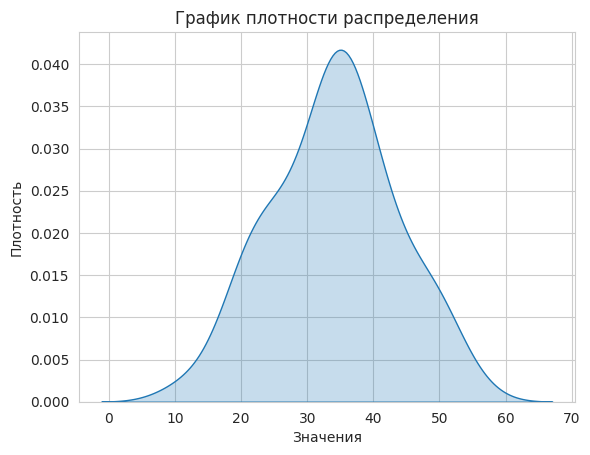

In [11]:
sns.set_style('whitegrid')
sns.kdeplot(variance_row, fill=True)
plt.xlabel("Значения")  
plt.ylabel("Плотность")  
plt.title("График плотности распределения")  
plt.show() 

Основываясь на виде эмпирической функции, сделаем предположение, что генеральная совокупность имеет нормальное распределение

Оценим параметры распределения методом моментов. Основываясь на том, что мы сделали предположение о нормальном распределении генеральной совокупности, найдем параметры a и σ


Приравняем начальный теоретический момент первого порядка и центральный теоретический момент второго порядка соответствующим эмпирическим моментам:
ν1 = M1, μ2 = m2
Учитывая, что ν1 = М(X), M1 = $\bar{X}$в, μ2 = D(X), m2 = Dв

Имеем
\
\begin{cases}
М(X) = \bar{X}в \\
D(X) = Dв 
\end{cases}
\
Математическое ожидание и дисперсия нормального распределения известны, откуда
получаем:
\
\begin{cases}
М(X) = a = \bar{X}в \\
D(X) = σ^2 = Dв 
\end{cases}
\
Поэтому находим оценки параметров: 

a* = $\bar{X}$в = 1/n ($\sum_{i=1}^{n} x_i * n_i$) = 34.008

σ* = $\sqrt{Dв}$ =  $\sqrt{(1 / n) * \sum_{i=1}^{n} (x_i - \bar{X}в)^2}$ = 9.336



Построим график плотности вероятности

In [12]:
def propabilityDensity(x):
    return (1 / (9.336 * np.sqrt(2 * np.pi))) * np.exp(- (x - 34.008) ** 2 / (2 * (9.336 ** 2)))

In [13]:
X = np.arange(0, 70, 0.1)
Y = [propabilityDensity(x) for x in X]

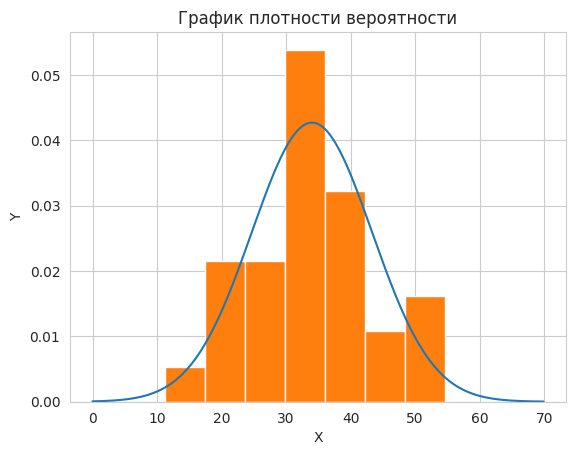

In [14]:
plt.title("График плотности вероятности")
plt.xlabel("X")
plt.ylabel("Y")
plt.plot(X, Y)
plt.hist(data, bins=7, density=True)
plt.show()

Проверим выполнения правила "трех сигма". 

In [15]:
print(sample_mean - 3 * std)
print(sample_mean + 3 * std)

5.764968280784707
62.25169838588197


In [16]:
print(variance_row[0])
print(variance_row[len(variance_row) - 1])

11.3
54.6


Отрезок [a - 3σ, a + 3σ] равен [5.76, 62.23]. Заметим, что все значения нашей выборки попадают в этот отрезок. Следовательно, правило "трех сигм" выполняется, что соответсвует нормальному распределению

In [17]:
a = 34.008
std = 9.336

In [18]:
X = np.linspace(a - 3 * std, a + 3 * std, 1000)
cdf = norm.cdf(X, a, std)

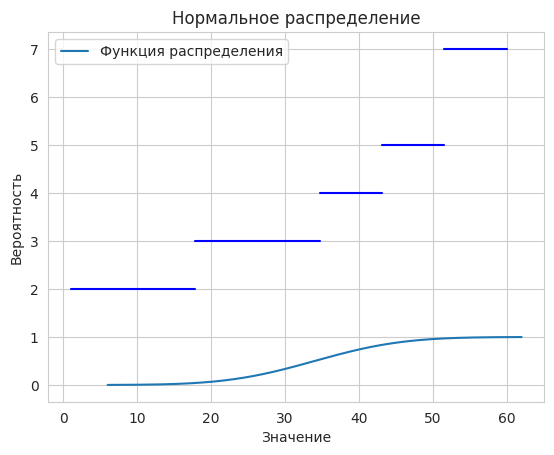

In [34]:
plt.plot(X, cdf, label='Функция распределения')
# hist, edges = np.histogram(empirical_func, bins=len(empirical_func))
# Y = hist.cumsum()
# for i in range(len(Y)):
#     plt.plot([edges[i], edges[i+1]], [Y[i], Y[i]], c='blue')
plt.title('Нормальное распределение')
plt.xlabel('Значение')
plt.ylabel('Вероятность')
plt.legend()
plt.show()

Применим критерий согласия Пирсона для проверки выдвинутой гипотезы
$$
\chi^2 = \sum \frac{(n_i - n'_i)^2}{n'_i}
$$
Примем за $X_i$ середины интервалов 

In [20]:
X_i = [(11.3 + 7 * i) for i in range(7)]
print(X_i)

[11.3, 18.3, 25.3, 32.3, 39.3, 46.3, 53.3]


Далее найдем $Z_i$ такие, что $$z_i = \frac{x_i - a}{\sigma}$$

In [21]:
Z = [np.round(((x - a) / std), 2) for x in X_i]
print(Z)

[-2.43, -1.68, -0.93, -0.18, 0.57, 1.32, 2.07]


In [22]:
def gauss_f(z):
    return (1 / np.sqrt(2 * np.pi)) * np.exp(-z**2 / 2)

$n'_i = \frac{h \cdot n}{\sigma} \cdot f(z_i)$ , где $f$ - функция Гаусса

In [23]:
N_i = [np.round((7 * 60 * gauss_f(z) / std), 2) for z in Z]
print(N_i)

[0.94, 4.38, 11.65, 17.66, 15.26, 7.51, 2.11]


In [24]:
Xi = np.sum([((len(interval_variance_row[i][1]) - N_i[i]) ** 2 / N_i[i]) for i in range(len(N_i))])
Xi

0.7875618303408939

Видим, что $X^2 \approx 0.79$ < $X^2_к \approx 9.49$

Следовательно, на уровне значимости 0.05 гипотезу о нормальном распределении генеральной совокупности принимаем

In [25]:
for i in range(7):
    print((len(interval_variance_row[i][1])))

1
6
11
18
14
8
2


Найдем доверительный интервал для генеральной средней по уровню надежности $\gamma = 0.95$

Точность оценки рассчитывается по формуле: 
$$ \delta = \frac{t_y \sigma}{\sqrt{n}} $$

$t_y$ - коэффициент доверия, отыскивается из соотношения:
$$ 2\Phi(t_y) = \gamma$$
где $\Phi(x)$ - функция Лапласа

Отсюда $$ t_y \approx 1.96$$

In [26]:
d = (1.96 * std) / np.sqrt(60)
d

2.3623339379859063

In [27]:
a

34.008

In [28]:
print(a - d, a + d)

31.645666062014097 36.37033393798591


Доверительный интервал для генеральной средней по уровню надежности $\gamma = 0.95$: (31,65; 36,37)

Найдем доверительный интервал для генерального среднеквадратического отклонения по уровню надежности $\gamma = 0.95$

Будем расчитывать искомый интервал по формуле: 
$$ \frac{\sqrt{n - 1} \cdot s}{\chi_{\alpha_1,k}} < \sigma < \frac{\sqrt{n - 1} \cdot s}{\chi_{\alpha_2,k}} $$

$$ \alpha_1 = \frac{1 - \gamma}{2} = \frac{1 - 0.95}{2} = 0.025$$ 

$$ \alpha_2 = \frac{1 + \gamma}{2} = \frac{1 + 0.95}{2} = 0.975$$

$$ \chi^2_{\alpha_1,k} = \chi^2_{0.025, 59} \approx 82.12$$

$$ \chi^2_{\alpha_2,k} = \chi^2_{0.975, 59} \approx 39.66$$

In [29]:
start = np.sqrt(59) * std / np.sqrt(82.12)
end = np.sqrt(59) * std / np.sqrt(39.66)

In [30]:
start

7.913386513868527

In [31]:
end

11.387030762737405

In [32]:
std

9.336

Доверительный интервал для генерального среднеквадратического отклонения по уровню надежности $\gamma = 0.95$: (9.34; 11.39)